# Recreate Figure 1 from Kay, 2012 (CERES CRE vs. CAM4/5)

We compared CAM fluxes to observed top-of-atmosphere (TOA) fluxes in version 2.6 of the Clouds and the Earth’s
Radiant Energy System (CERES)–Energy Balanced and Filled (EBAF) dataset (Loeb et al. 2009), a dataset currently
available over a 10-yr period from March 2000 to February 2010.

### Add paths to run locally or off Cheyenne or Casper 
(what is the difference between these two again?)

In [1]:
import sys
# Add common resources folder to path
sys.path.append('/glade/u/home/jonahshaw/Scripts/git_repos/CESM2_analysis')
sys.path.append('/glade/u/home/jonahshaw/Scripts/git_repos/CESM2_analysis/Common/')
# sys.path.append("/home/jonahks/git_repos/netcdf_analysis/Common/")

from imports import (
    pd, np, xr, mpl, plt, sns, os, 
    datetime, sys, crt, gridspec,
    ccrs, metrics, Iterable, cmaps
    )

from functions import (
    masked_average, add_weights, sp_map,
    season_mean, get_dpm, leap_year, share_ylims,
    to_png
    )

from cloud_metric import Cloud_Metric
from collections import deque
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Find the files

In [2]:
case_dir = '/glade/scratch/jonahshaw/archive/Kay_COSP_2012/'

In [3]:
os.chdir(case_dir)

In [4]:
os.listdir()

['cam5_1deg_release_amip', 'cam4_1deg_release_amip']

### Load post-processed CAM4 and CAM5 files into a cloud metric

In [22]:
fig1metric = Cloud_Metric(case_dir)
fig1metric.add_case('cam4_1deg_release_amip',label='CAM4')
fig1metric.add_case('cam5_1deg_release_amip',label='CAM5')

Loading GOCCP data...done.
Loading CALIOP SLFs...Could not load cloudtop CALIOP slfs from caliop_olimpia/ct_slf_olimpia/cloudtop_slfs.nc
Loading CERES-EBAF fluxes...done.
Loading ISCCP cloud total...done.
Loading MISR cloud histograms...done.
Loading MODIS cloud histograms...done.
Processed timeseries directory found for cam4_1deg_release_amip. Will load data as required.
cam4_1deg_release_amip load successfully.
Processed timeseries directory found for cam5_1deg_release_amip. Will load data as required.
cam5_1deg_release_amip load successfully.


In [49]:
obsmetric = Cloud_Metric(case_dir)

cam4metric = Cloud_Metric(case_dir)
cam4metric.add_case('cam4_1deg_release_amip',label='CAM4')

cam5metric = Cloud_Metric(case_dir)
cam5metric.add_case('cam5_1deg_release_amip',label='CAM5')

Loading GOCCP data...done.
Loading CALIOP SLFs...Could not load cloudtop CALIOP slfs from caliop_olimpia/ct_slf_olimpia/cloudtop_slfs.nc
Loading CERES-EBAF fluxes...done.
Loading ISCCP cloud total...done.
Loading MISR cloud histograms...done.
Loading MODIS cloud histograms...done.
Loading GOCCP data...done.
Loading CALIOP SLFs...Could not load cloudtop CALIOP slfs from caliop_olimpia/ct_slf_olimpia/cloudtop_slfs.nc
Loading CERES-EBAF fluxes...done.
Loading ISCCP cloud total...done.
Loading MISR cloud histograms...done.
Loading MODIS cloud histograms...done.
Processed timeseries directory found for cam4_1deg_release_amip. Will load data as required.
cam4_1deg_release_amip load successfully.
Loading GOCCP data...done.
Loading CALIOP SLFs...Could not load cloudtop CALIOP slfs from caliop_olimpia/ct_slf_olimpia/cloudtop_slfs.nc
Loading CERES-EBAF fluxes...done.
Loading ISCCP cloud total...done.
Loading MISR cloud histograms...done.
Loading MODIS cloud histograms...done.
Processed timeserie

### Only use observations from 2006-2010

In [54]:
# obsmetric.ceres_data = obsmetric.ceres_data.sel(time=slice('2006-01-01', '2010-12-31'))
# cam5metric.ceres_data = cam5metric.ceres_data.sel(time=slice('2006-01-01', '2010-12-31'))
# cam4metric.ceres_data = cam4metric.ceres_data.sel(time=slice('2006-01-01', '2010-12-31'))

obsmetric.ceres_data = obsmetric.ceres_data.sel(time=slice('2000-03-01', '2010-02-28'))
cam5metric.ceres_data = cam5metric.ceres_data.sel(time=slice('2000-03-01', '2010-02-28'))
cam4metric.ceres_data = cam4metric.ceres_data.sel(time=slice('2000-03-01', '2010-02-28'))

### Load original data as a cross-check

In [56]:
og_dir = '/glade/u/home/jonahshaw/w/kay2012_OGfiles'
# os.listdir(og_dir)

In [57]:
og_swcf = xr.open_dataset('%s/CERES-EBAF.SWCF.nc' % (og_dir))
og_lwcf = xr.open_dataset('%s/CERES-EBAF.LWCF.nc' % (og_dir))

#### Check global values with my machinery

In [58]:
sw_2012 = add_weights(og_swcf['SWCFTOA'])
lw_2012 = add_weights(og_lwcf['LWCFTOA'])

In [59]:
sw_2012j = add_weights(obsmetric.ceres_data['SWCF'])
lw_2012j = add_weights(obsmetric.ceres_data['LWCF'])

In [60]:
sw_avg = masked_average(sw_2012,weights=sw_2012['cell_weight'])
print('CERES-EBAF SWCF (2012) avg: %s' % sw_avg.values)

lw_avg = masked_average(lw_2012,weights=lw_2012['cell_weight'])
print('CERES-EBAF LWCF (2012) avg: %s' % lw_avg.values)

sw_avg = masked_average(sw_2012j,weights=sw_2012j['cell_weight'])
print('CERES-EBAF SWCF (2021) avg: %s' % sw_avg.values)

lw_avg = masked_average(lw_2012j,weights=lw_2012j['cell_weight'])
print('CERES-EBAF LWCF (2021) avg: %s' % lw_avg.values)

CERES-EBAF SWCF (2012) avg: -47.071148
CERES-EBAF LWCF (2012) avg: 26.475805
CERES-EBAF SWCF (2021) avg: -45.839622
CERES-EBAF LWCF (2021) avg: 28.09088


#### The 2012 values are right on the Kay 2012 paper, and my observations are slightly different. I wonder why. Probably I am using a new CERES-EBAF version. v4 as opposed to v3?

In [ ]:
obsmetric.ceres_data

In [26]:
ceres_test = obsmetric.ceres_data

/glade/work/jonahshaw/miniconda3/envs/cheycomp/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1508: UserWarning: The following kwargs were not used by contour: 'add_colorbar', 'robust'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)
/glade/work/jonahshaw/miniconda3/envs/cheycomp/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/glade/work/jonahshaw/miniconda3/envs/cheycomp/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/glade/work/jonahshaw/miniconda3/envs/cheycomp/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1508: UserWarning: The following kwargs were not used by contour: 'add_colorbar',

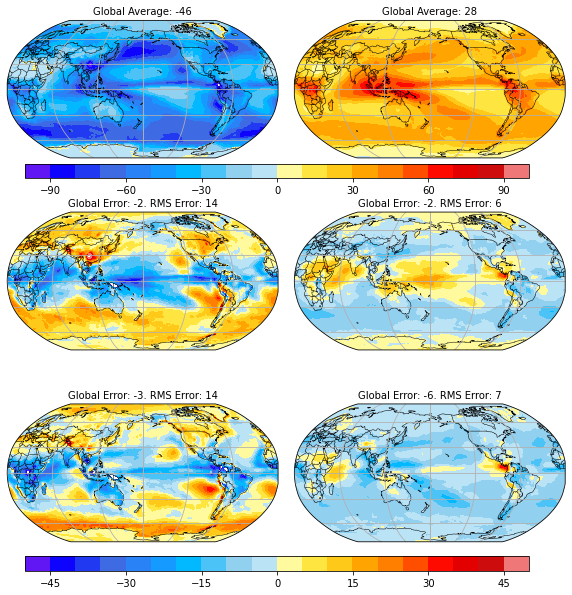

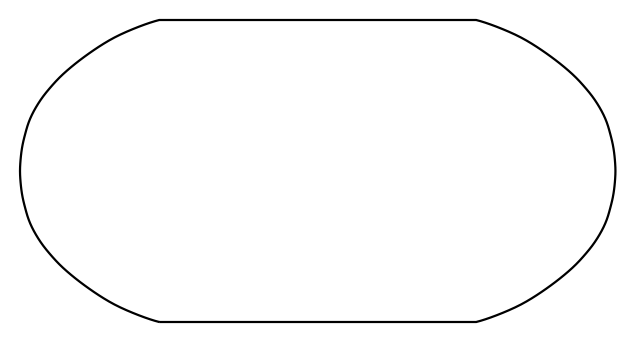

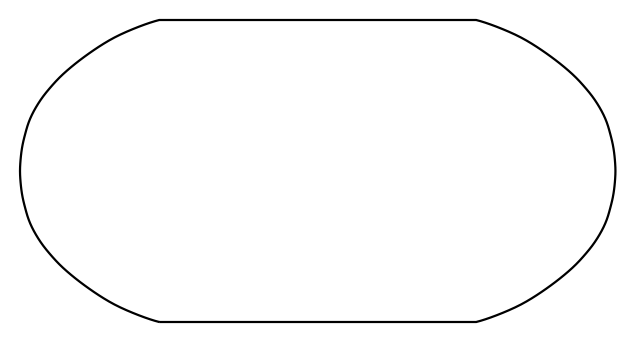

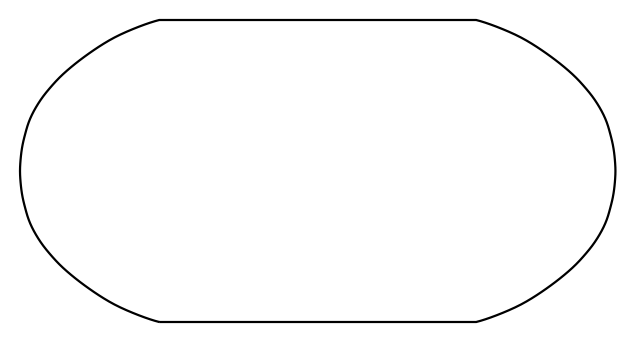

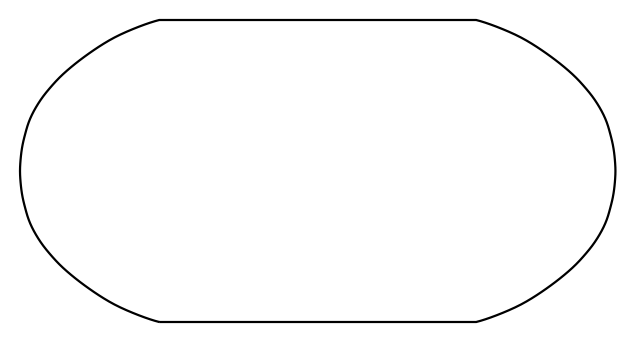

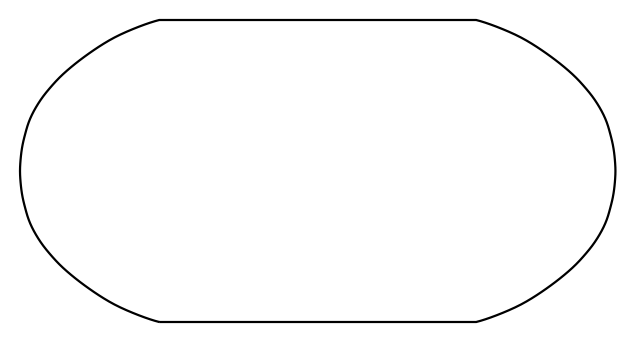

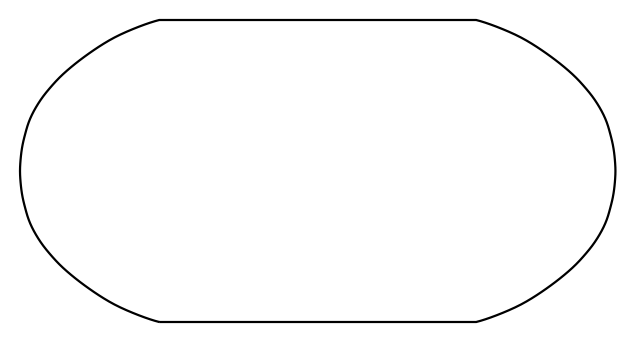

In [13]:
# fig,axs = plt.subplots(nrows=2,ncols=2,sharey='row')
fig, axs = sp_map(nrows=3, ncols=2, projection=ccrs.Robinson(central_longitude=180))#, figsize=[15,2*(len(self.cases))])

fig.set_figheight(10)
fig.set_figwidth(10)
# fig.set_dpi(200)

axs = axs.flat
fig.subplots_adjust(wspace=0.06)

swcfobs = obsmetric.plot2D('SWCF',ax=[axs[0]],bias=False,contour=True,
                           levels=np.linspace(-100,100,21),extend='neither',
                           projection='Robinson',add_colorbar=False,label=False)
lwcfobs = obsmetric.plot2D('LWCF',ax=[axs[1]],bias=False,contour=True,
                           levels=np.linspace(-100,100,21),extend='neither',
                           projection='Robinson',add_colorbar=False,label=False)

swcfcam4 = cam4metric.plot2D('SWCF',ax=[axs[2]],bias=True,contour=True,
                             levels=np.linspace(-50,50,21),extend='neither',
                             projection='Robinson',add_colorbar=False,label=False)
swcfcam5 = cam4metric.plot2D('LWCF',ax=[axs[3]],bias=True,contour=True,
                             levels=np.linspace(-50,50,21),extend='neither',
                             projection='Robinson',add_colorbar=False,label=False)

lwcfcam4 = cam5metric.plot2D('SWCF',ax=[axs[4]],bias=True,contour=True,
                             levels=np.linspace(-50,50,21),extend='neither',
                             projection='Robinson',add_colorbar=False,label=False)
lwcfcam5 = cam5metric.plot2D('LWCF',ax=[axs[5]],bias=True,contour=True,
                             levels=np.linspace(-50,50,21),extend='neither',
                             projection='Robinson',add_colorbar=False,label=False)

cbar_axh1 = fig.add_axes([0.15, 0.645, 0.70, 0.02])
cbar_axh2 = fig.add_axes([0.15, 0.10, 0.70, 0.02])

cbar1 = fig.colorbar(swcfobs[1], cax=cbar_axh1,orientation='horizontal')
cbar2 = fig.colorbar(lwcfcam5[1], cax=cbar_axh2,orientation='horizontal')

# cbar1.set_label("%s (%s)" % (_da[var].long_name,_da[var].units))
# cbar2.set_label("%s (%s)" % (_da[var].long_name,_da[var].units))

### Substitute in the 2012 observations to see how Figure 1 changes

#### This reproduces the 2012 figure exactly, indicating that all changes are due to observation differences, presumably CERES-EBAF v4 changes.

In [41]:
obsmetric.ceres_data['SWCF'] = og_swcf['SWCFTOA']
cam4metric.ceres_data['SWCF'] = og_swcf['SWCFTOA']
cam5metric.ceres_data['SWCF'] = og_swcf['SWCFTOA']

obsmetric.ceres_data['LWCF'] = og_lwcf['LWCFTOA']
cam4metric.ceres_data['LWCF'] = og_lwcf['LWCFTOA']
cam5metric.ceres_data['LWCF'] = og_lwcf['LWCFTOA']

/glade/work/jonahshaw/miniconda3/envs/cheycomp/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1508: UserWarning: The following kwargs were not used by contour: 'add_colorbar', 'robust'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)
/glade/work/jonahshaw/miniconda3/envs/cheycomp/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/glade/work/jonahshaw/miniconda3/envs/cheycomp/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/glade/work/jonahshaw/miniconda3/envs/cheycomp/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1508: UserWarning: The following kwargs were not used by contour: 'add_colorbar',

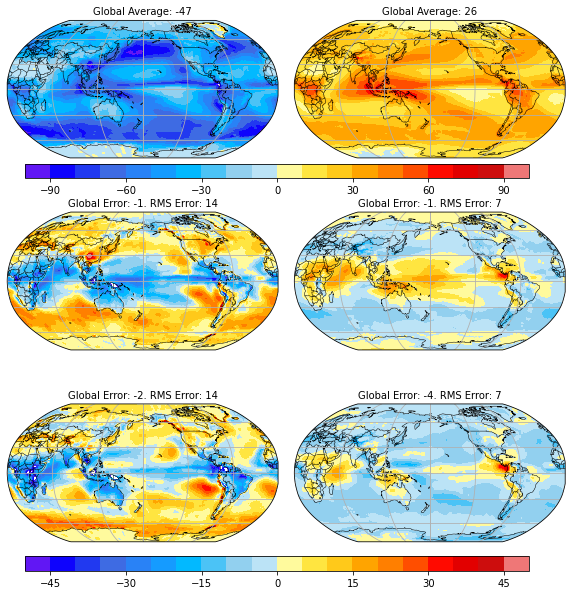

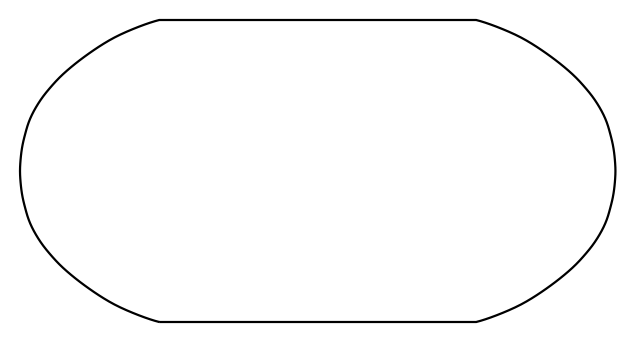

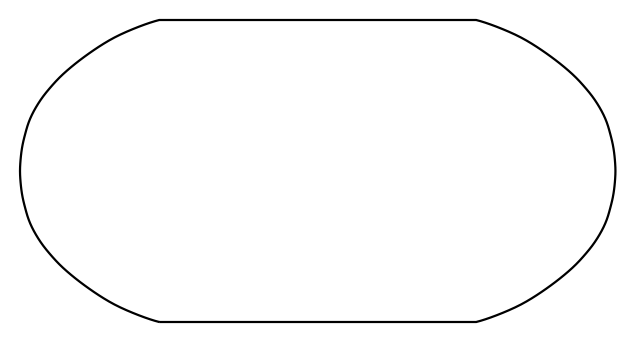

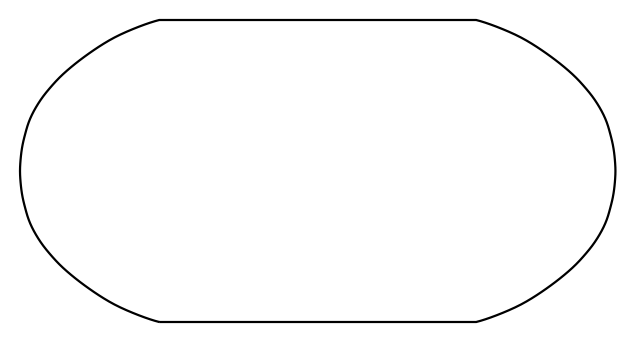

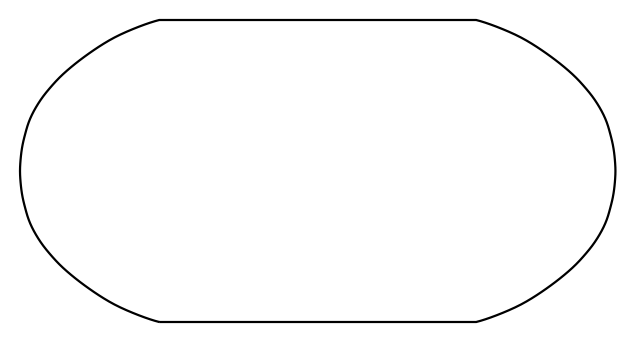

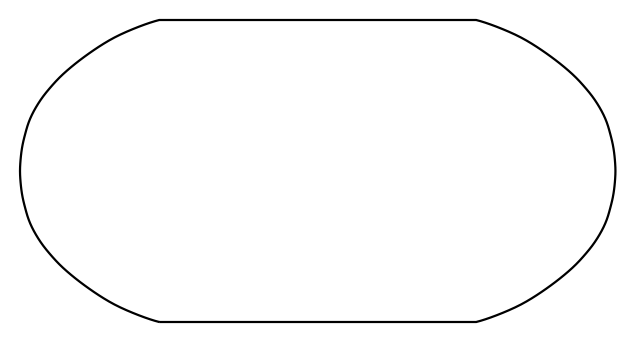

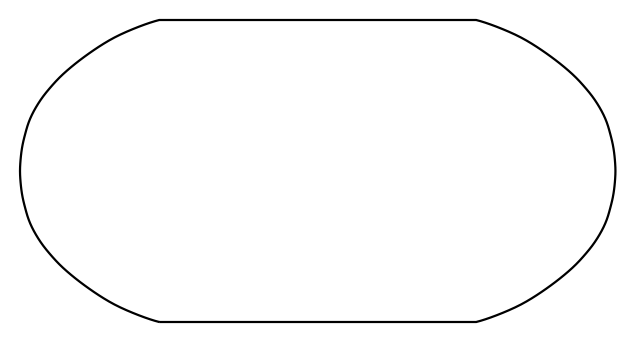

In [42]:
# fig,axs = plt.subplots(nrows=2,ncols=2,sharey='row')
fig, axs = sp_map(nrows=3, ncols=2, projection=ccrs.Robinson(central_longitude=180))#, figsize=[15,2*(len(self.cases))])

fig.set_figheight(10)
fig.set_figwidth(10)
# fig.set_dpi(200)

axs = axs.flat
fig.subplots_adjust(wspace=0.06)

swcfobs = obsmetric.plot2D('SWCF',ax=[axs[0]],bias=False,contour=True,
                           levels=np.linspace(-100,100,21),extend='neither',
                           projection='Robinson',add_colorbar=False,label=False)
lwcfobs = obsmetric.plot2D('LWCF',ax=[axs[1]],bias=False,contour=True,
                           levels=np.linspace(-100,100,21),extend='neither',
                           projection='Robinson',add_colorbar=False,label=False)

swcfcam4 = cam4metric.plot2D('SWCF',ax=[axs[2]],bias=True,contour=True,
                             levels=np.linspace(-50,50,21),extend='neither',
                             projection='Robinson',add_colorbar=False,label=False)
swcfcam5 = cam4metric.plot2D('LWCF',ax=[axs[3]],bias=True,contour=True,
                             levels=np.linspace(-50,50,21),extend='neither',
                             projection='Robinson',add_colorbar=False,label=False)

lwcfcam4 = cam5metric.plot2D('SWCF',ax=[axs[4]],bias=True,contour=True,
                             levels=np.linspace(-50,50,21),extend='neither',
                             projection='Robinson',add_colorbar=False,label=False)
lwcfcam5 = cam5metric.plot2D('LWCF',ax=[axs[5]],bias=True,contour=True,
                             levels=np.linspace(-50,50,21),extend='neither',
                             projection='Robinson',add_colorbar=False,label=False)

cbar_axh1 = fig.add_axes([0.15, 0.645, 0.70, 0.02])
cbar_axh2 = fig.add_axes([0.15, 0.10, 0.70, 0.02])

cbar1 = fig.colorbar(swcfobs[1], cax=cbar_axh1,orientation='horizontal')
cbar2 = fig.colorbar(lwcfcam5[1], cax=cbar_axh2,orientation='horizontal')

# cbar1.set_label("%s (%s)" % (_da[var].long_name,_da[var].units))
# cbar2.set_label("%s (%s)" % (_da[var].long_name,_da[var].units))

{'levels': array([-100.,  -90.,  -80.,  -70.,  -60.,  -50.,  -40.,  -30.,  -20.,
        -10.,    0.,   10.,   20.,   30.,   40.,   50.,   60.,   70.,
         80.,   90.,  100.]), 'extend': 'neither', 'robust': True, 'add_colorbar': False, 'transform': <cartopy.crs.PlateCarree object at 0x2b152c16bbf0>, 'cmap': <cmaps.colormap.Colormap object at 0x2b1518bbba10>}


/glade/work/jonahshaw/miniconda3/envs/cheycomp/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1508: UserWarning: The following kwargs were not used by contour: 'robust', 'add_colorbar'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)
/glade/work/jonahshaw/miniconda3/envs/cheycomp/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/glade/work/jonahshaw/miniconda3/envs/cheycomp/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


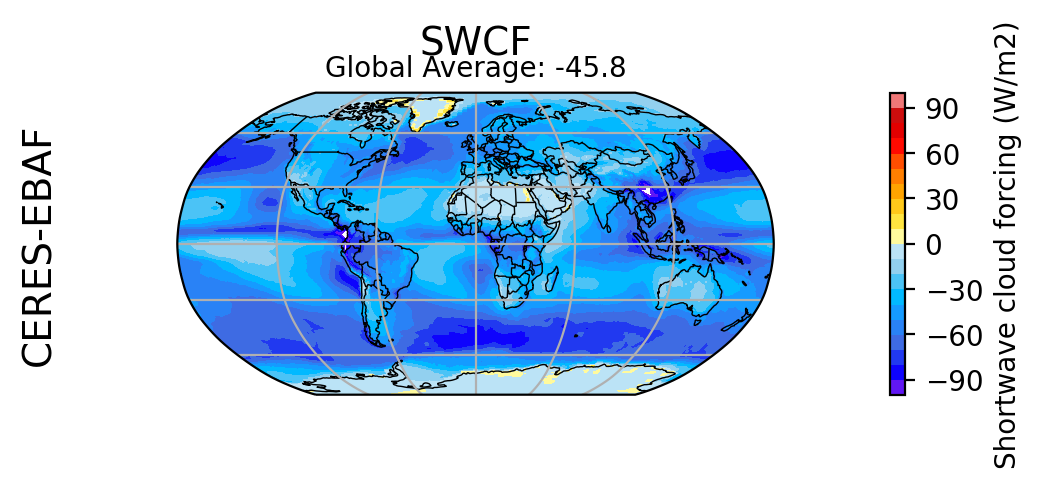

In [46]:
swcfobs = obsmetric.plot2D('SWCF',bias=False,contour=True,levels=np.linspace(-100,100,21),extend='neither',projection='Robinson')

{'levels': array([-50., -45., -40., -35., -30., -25., -20., -15., -10.,  -5.,   0.,
         5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.]), 'extend': 'neither', 'robust': True, 'add_colorbar': False, 'transform': <cartopy.crs.PlateCarree object at 0x2b3887f1cb90>, 'cmap': <cmaps.colormap.Colormap object at 0x2b387d702810>}
< GeoAxes: <cartopy.crs.Robinson object at 0x2b387f3153b0> >


/glade/work/jonahshaw/miniconda3/envs/cheycomp/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1508: UserWarning: The following kwargs were not used by contour: 'robust', 'add_colorbar'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)
/glade/work/jonahshaw/miniconda3/envs/cheycomp/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/glade/work/jonahshaw/miniconda3/envs/cheycomp/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


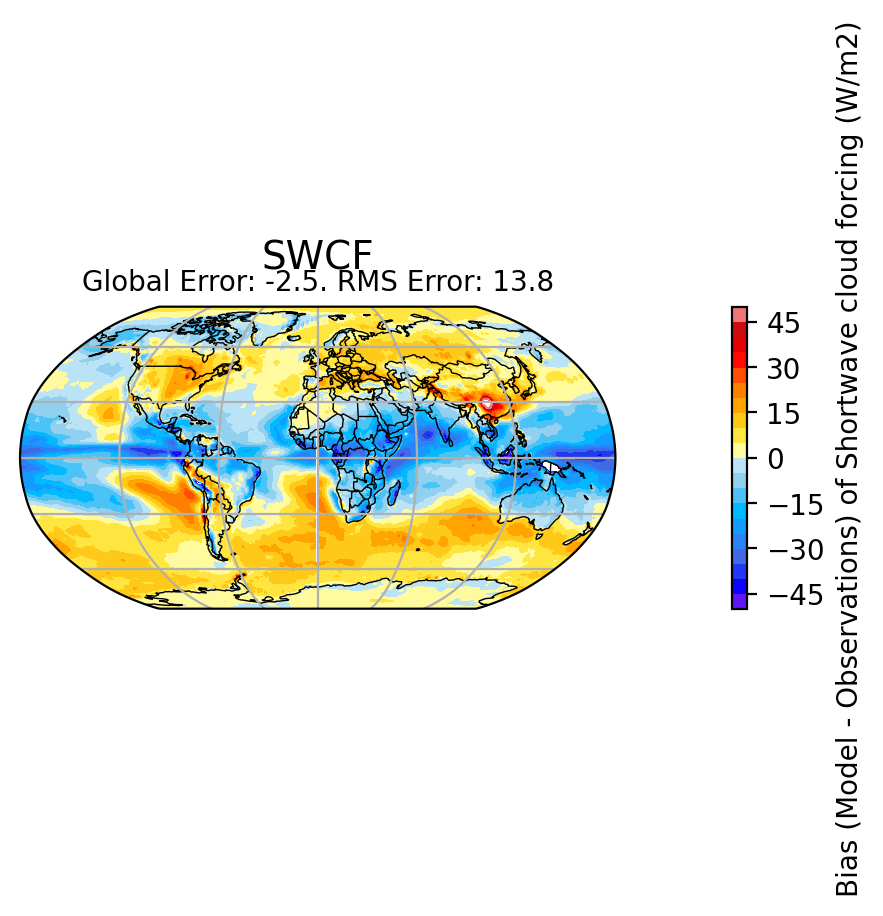

In [9]:
swcfcam4 = cam4metric.plot2D('SWCF',bias=True,contour=True,levels=np.linspace(-50,50,21),extend='neither',projection='Robinson')